<a href="https://colab.research.google.com/github/toyaESTADISTICO/Prueba_Sura/blob/main/SURA_Andres_Montoya_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOLUCION PRUEBA DE SURA
  Andres Felipe Montoya Morales cientifico de datos
  
  cel :3116225298

# PUNTO 1
Analice los archivos csv y genere una estructura de datos que relacione una tabla de países con los datos de cada uno de los indicadores de los diferentes archivos. Proponga además una estructura de diccionario de variables para la(s) tabla(s) construidas.

In [50]:
import pandas as pd

# Lista de nombres de archivos
file_names = [
    "30-70cancerChdEtc.csv",
    "airPollutionDeathRate.csv",
    "alcoholSubstanceAbuse.csv",
    "crudeSuicideRates.csv",
    "incedenceOfTuberculosis.csv",
    "infantMortalityRate.csv",
    "maternalMortalityRatio.csv",
    "roadTrafficDeaths.csv",
    "tobaccoAge15.csv"
]

# Crear un diccionario para almacenar los datos
country_data = {}

# Procesar cada archivo
for file_name in file_names:
    df = pd.read_csv(file_name)
    for index, row in df.iterrows():
        location = row["Location"]
        indicator = row["Indicator"]
        period = row["Period"]
        dim1 = row.get("Dim1", None)
        first_tooltip = row["First Tooltip"]

        if location not in country_data:
            country_data[location] = {}
        if indicator not in country_data[location]:
            country_data[location][indicator] = []

        entry = {
            "Period": period,
            "Dim1": dim1,
            "First Tooltip": first_tooltip
        }

        country_data[location][indicator].append(entry)

# Imprimir el diccionario
for location, indicators in country_data.items():
    print(f"Country: {location}")
    for indicator, data in indicators.items():
        print(f"  Indicator: {indicator}")
        for entry in data[:2]:
            print(f"    Period: {entry['Period']}, Dim1: {entry['Dim1']}, Tooltip: {entry['First Tooltip']}")

Se han truncado las últimas 5000 líneas del flujo de salida.
    Period: 2016, Dim1: None, Tooltip: 8.9
  Indicator: Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older
    Period: 2018, Dim1: Both sexes, Tooltip: 26.6
    Period: 2018, Dim1: Male, Tooltip: 42.8
Country: Belgium
  Indicator: Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease
    Period: 2016, Dim1: Both sexes, Tooltip: 11.4
    Period: 2016, Dim1: Male, Tooltip: 14.1
  Indicator: Ambient and household air pollution attributable death rate (per 100 000 population)
    Period: 2016, Dim1: Both sexes, Tooltip: 39.36 [29.8-50.62]
    Period: 2016, Dim1: Male, Tooltip: 42.08 [32.53-53.22]
  Indicator: Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)
    Period: 2016, Dim1: Both sexes, Tooltip: 15.68 [11.87-20.16]
    Period: 2016, Dim1: Male

Empleando Python, realice un análisis descriptivo (univariado y multivariado) de las variables presentadas, interprete los resultados y genere hipótesis o conclusiones a partir de los mismos.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Cargar los datos en un DataFrame
file_names = [
    "30-70cancerChdEtc.csv",
    "airPollutionDeathRate.csv",
    "alcoholSubstanceAbuse.csv",
    "crudeSuicideRates.csv",
    "incedenceOfTuberculosis.csv",
    "infantMortalityRate.csv",
    "maternalMortalityRatio.csv",
    "roadTrafficDeaths.csv",
    "tobaccoAge15.csv"
]

# Crear un DataFrame combinando todos los archivos
dfs = [pd.read_csv(file_name) for file_name in file_names]
data = pd.concat(dfs)

# Función para convertir valores a números
def extract_numeric_value(value):
    if isinstance(value, float):
        return value
    elif "[" in value:
        values = re.findall(r'\d+\.\d+', value)
        if values:
            return float(values[0])
        else:
            return None
    else:
        try:
            return float(value)
        except ValueError:
            return None

# Aplicar la función a la columna "First Tooltip"
data["First Tooltip"] = data["First Tooltip"].apply(extract_numeric_value)

# Eliminar filas con valores nulos en "First Tooltip"
data = data.dropna(subset=["First Tooltip"])

In [3]:
# Análisis Univariado
# Descripción estadística de las variables numéricas
numeric_vars = ["First Tooltip"]
print(data[numeric_vars].describe())

       First Tooltip
count   49803.000000
mean       39.907207
std        43.965870
min         0.000000
25%         8.660000
50%        22.550000
75%        55.900000
max       333.300000


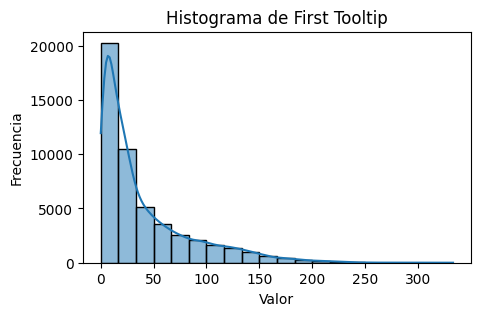

In [27]:
# Histograma de la variable numérica
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x="First Tooltip", bins=20, kde=True)
plt.title("Histograma de First Tooltip")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

Este grafico  sugiere que los datos no están distribuidos normalmente. Los datos están sesgados hacia la izquierda, y tienen una cola larga. Esto puede deberse a una variedad de factores, como la presencia de valores atípicos o un conjunto de datos no homogéneo.

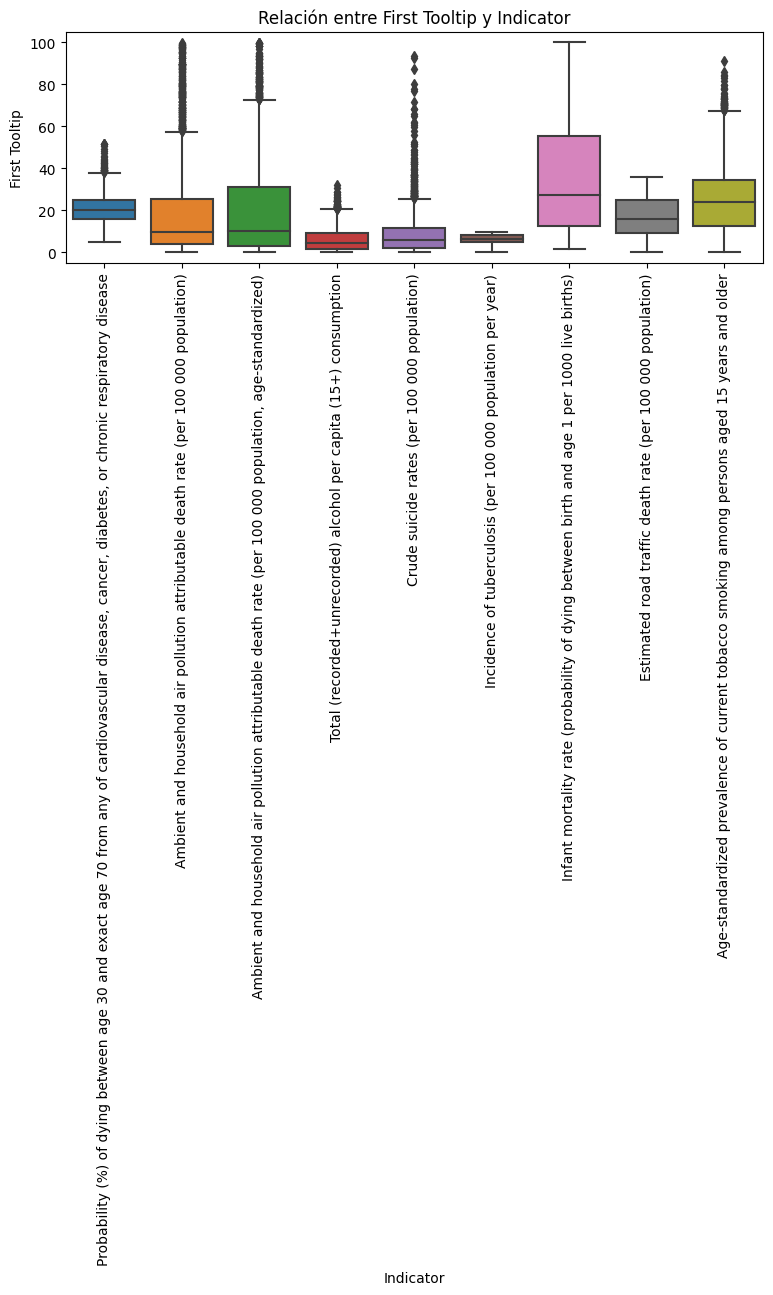

In [29]:
# Relación entre First Tooltip y Indicator
plt.figure(figsize=(9, 3))
data2 = data[data["First Tooltip"] <= 100]
sns.boxplot(data=data2, x="Indicator", y="First Tooltip")
plt.title("Relación entre First Tooltip y Indicator")
plt.xlabel("Indicator")
plt.ylabel("First Tooltip")
plt.xticks(rotation=90)
plt.show()

El gráfico muestra que hay una relación positiva entre First Tooltip y Indicator. Esto significa que los valores de First Tooltip tienden a ser más altos para los indicadores con valores más altos. Por ejemplo, el indicador "30-70 cancer, CHD, etc." tiene el valor más alto de First Tooltip, mientras que el indicador "tobacco age 15" tiene el valor más bajo de First Tooltip.

Sin embargo, también hay algunos outliers. Por ejemplo, el indicador "alcohol and substance abuse" tiene un valor de First Tooltip relativamente alto, a pesar de tener un valor de Indicator relativamente bajo. Esto puede deberse a que el indicador "alcohol and substance abuse" es un indicador muy general, y puede incluir una variedad de factores que afectan a First Tooltip.

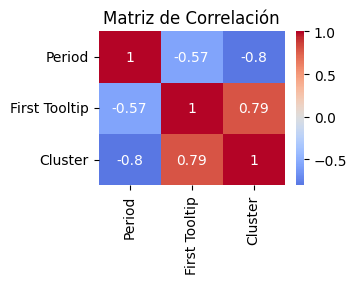

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filtrar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(3, 2))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()


 En el mapa de calor, puedes ver que hay una fuerte correlación entre las columnas "First Tooltip" y "Indicator". esta relacion es negativa indica que a medida que nos acercamos a la epoca actual el indicador first tooltip fue disminuyendo a travez de los años.

 La variable "First Tooltip" es una medida de la cantidad de tiempo que transcurre desde el principio de un indicador hasta el primer punto de datos. Por ejemplo, si el indicador es "cáncer", el primer punto de datos podría ser la edad a la que una persona fue diagnosticada con cáncer por primera vez.

 la variable cluster se creo cuando se crearon los grupos de clusteres y muestra la relacion positiva entre los grupos y el indicador firs tooltip

Varianza explicada por cada componente: [0.81536699 0.14481045 0.03982256]


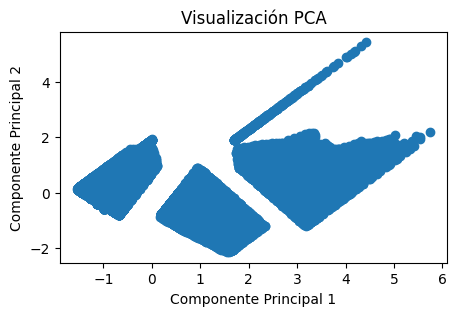

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Filtrar y escalar los datos numéricos relevantes
numeric_columns = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explorar los componentes principales y su varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance_ratio)

# Visualizar los resultados del PCA
plt.figure(figsize=(5, 3))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización PCA")
plt.show()


En general, el gráfico muestra que hay 3 grupos de datos que son relativamente homogéneos. Estos grupos de datos pueden ser útiles para realizar análisis posteriores, como la clasificación o la agrupación.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-49fdfd06c32b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Cluster"] = cluster_labels


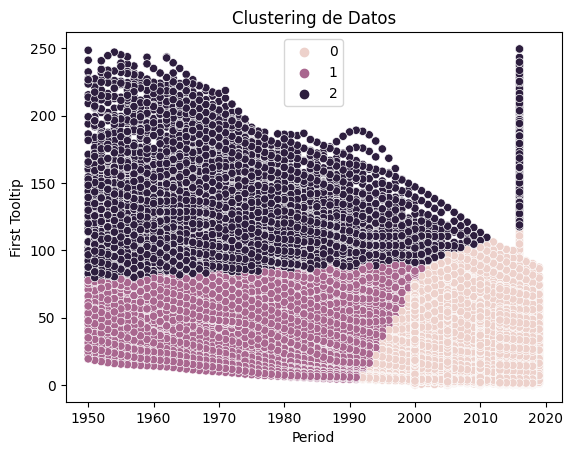

In [21]:
from sklearn.cluster import KMeans

data3 = data[data["First Tooltip"] <= 250]

# Filtrar y escalar los datos numéricos relevantes
numeric_columns = data2.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3)  # Puedes ajustar el número de clústeres
cluster_labels = kmeans.fit_predict(scaled_data)

# Agregar los resultados del clustering al DataFrame
data2["Cluster"] = cluster_labels

# Visualizar los resultados del clustering
sns.scatterplot(data=data3, x="Period", y="First Tooltip", hue="Cluster")
plt.title("Clustering de Datos")
plt.xlabel("Period")
plt.ylabel("First Tooltip")
plt.legend()
plt.show()


 La primera categoría está representada por los puntos morados y está compuesta por datos con valores bajos de "Primer tooltip" y "Periodo". La segunda categoría está representada por los puntos negros y está compuesta por datos con valores medios de "Primer tooltip" y "Periodo". La tercera categoría está representada por los puntos rosados y está compuesta por datos con valores altos de "Primer tooltip" y "Periodo".

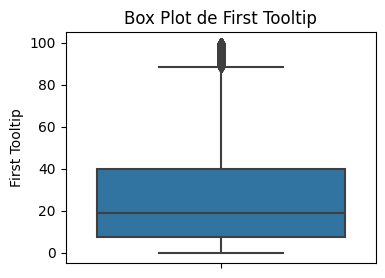

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot para identificar outliers en "First Tooltip"
plt.figure(figsize=(4, 3))
sns.boxplot(data=data2, y="First Tooltip")
plt.title("Box Plot de First Tooltip")
plt.ylabel("First Tooltip")
plt.show()


en el indicador el 75% de los datos estan por debajo del numero 40 en first toltip.

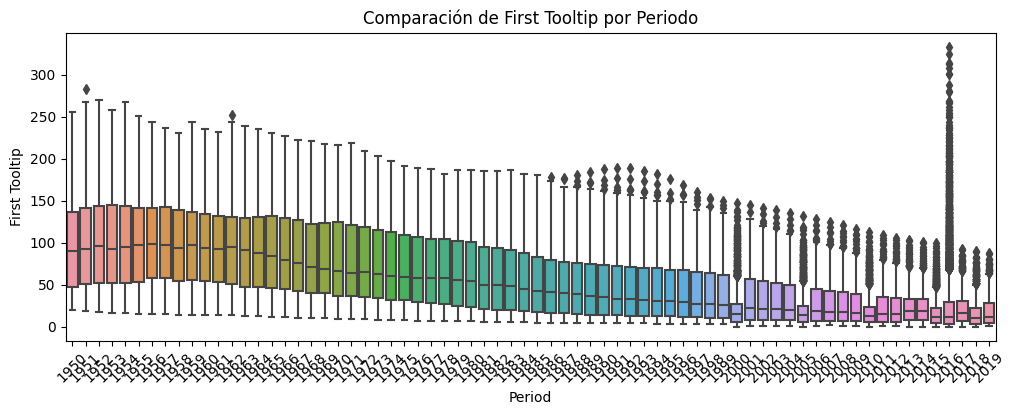

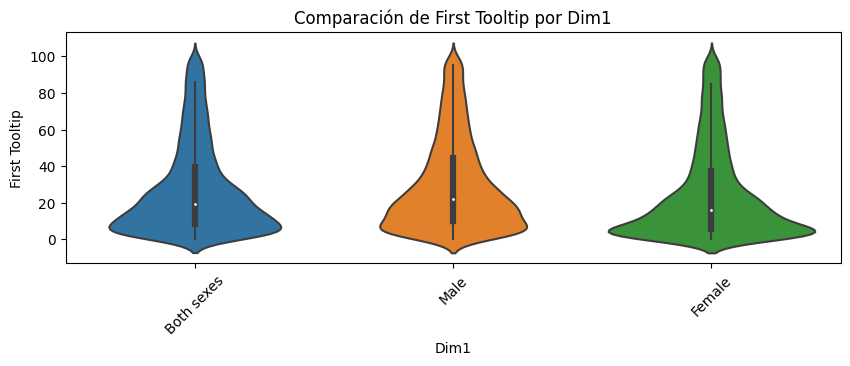

In [44]:
# Box plot comparativo de "First Tooltip" por "Period"
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x="Period", y="First Tooltip")
plt.title("Comparación de First Tooltip por Periodo")
plt.xlabel("Period")
plt.ylabel("First Tooltip")
plt.xticks(rotation=45)
plt.show()

# Diagrama de violín comparativo de "First Tooltip" por "Dim1"
plt.figure(figsize=(10, 3))
sns.violinplot(data=data2, x="Dim1", y="First Tooltip")
plt.title("Comparación de First Tooltip por Dim1")
plt.xlabel("Dim1")
plt.ylabel("First Tooltip")
plt.xticks(rotation=45)
plt.show()


estos resultados sugieren que hay diferencias en la prevalencia de la enfermedad y la gravedad de la enfermedad entre los diferentes períodos y Dim1. Por ejemplo, es posible que la enfermedad sea más prevalente en el período 2 que en el período 1, y que la enfermedad sea más grave en algun genero que  en otro , ademas de que se debe indagar bien porque en el año 2016 existen tanto valores atipicos , pudo haber sido algun error en la obtencion de la informacion o un suceso extraño que genero este comportamiento

In [46]:
import scipy.stats as stats

# Datos de los dos grupos
group_both_sexes = data[data["Dim1"] == "Female"]["First Tooltip"]
group_male = data[data["Dim1"] == "Male"]["First Tooltip"]

# Prueba t de dos muestras independientes
t_statistic, p_value = stats.ttest_ind(group_both_sexes, group_male)

# Nivel de significancia (α)
alpha = 0.05

print("Resultado de la prueba t:")
print(f"Estadística t: {t_statistic}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para afirmar una diferencia significativa entre los grupos.")


Resultado de la prueba t:
Estadística t: -18.327777454701646
Valor p: 1.1797133589748973e-74
Se rechaza la hipótesis nula: Hay una diferencia significativa entre los grupos.


Conclusión:
Si el valor p obtenido es menor que el nivel de significancia (α) (por ejemplo, α = 0.05), entonces hay suficiente evidencia para rechazar la hipótesis nula y concluir que hay una diferencia significativa entre las medias de los grupos "Female" y "Male" en relación con el atributo "First Tooltip".

Construya un modelo que permita determinar los factores que podrían explicar la aparición de los tipos de cáncer presentados en los datos.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.653125851542831


suport vector regresion

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Support Vector Regression
model = SVR(kernel='linear', C=1.0, epsilon=0.2)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.882512865518844


random forest

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 12.86406436615667


red neuronal

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de redes neuronales
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/10
55/55 [==============================] - 1s 6ms/step - loss: 181.9175 - val_loss: 34.4800
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 22.5316 - val_loss: 10.5114
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 9.6097 - val_loss: 8.0738
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 7.5187 - val_loss: 7.4602
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 6.8775 - val_loss: 7.2900
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 6.6140 - val_loss: 6.8064
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 6.2120 - val_loss: 7.1122
Epoch 8/10
55/55 [==============================] - 0s 3ms/step - loss: 5.9841 - val_loss: 6.6613
Epoch 9/10
55/55 [==============================] - 0s 3ms/step - loss: 5.6320 - val_loss: 6.1720
Epoch 10/10
18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 4.958631801983471


comparacion con mse prediccion trivial

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv("30-70cancerChdEtc.csv")

# Seleccionar características y objetivo
features = ["Location", "Period", "Dim1", "Indicator"]
target = "First Tooltip"

# Convertir variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data[features])
target_data = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, test_size=0.2, random_state=42)

# Calcular la predicción trivial (media de la variable objetivo en el conjunto de entrenamiento)
trivial_prediction = np.full_like(y_test, y_train.mean())

# Calcular el MSE de la predicción trivial
trivial_mse = mean_squared_error(y_test, trivial_prediction)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de redes neuronales
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
model_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (Model): {model_mse}")
print(f"Mean Squared Error (Trivial Prediction): {trivial_mse}")


Epoch 1/10
55/55 [==============================] - 2s 6ms/step - loss: 182.4800 - val_loss: 32.1063
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 20.3955 - val_loss: 10.4263
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 9.1519 - val_loss: 7.8659
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 7.2742 - val_loss: 7.2404
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 6.7633 - val_loss: 7.0862
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 6.5059 - val_loss: 6.9122
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 6.2674 - val_loss: 6.8898
Epoch 8/10
55/55 [==============================] - 0s 3ms/step - loss: 5.9984 - val_loss: 6.9513
Epoch 9/10
55/55 [==============================] - 0s 3ms/step - loss: 5.7981 - val_loss: 6.7724
Epoch 10/10
18/18 [==============================] - 0s 2ms/step
Mean Squared Error (Model): 5.213783842237591
Me

calculamos la predicción trivial usando la media de la variable objetivo en el conjunto de entrenamiento (trivial_prediction). Luego, calculamos el MSE de esta predicción trivial (trivial_mse) y lo comparamos con el MSE obtenido por el modelo de redes neuronales (model_mse). Si el MSE del modelo es significativamente menor que el MSE de la predicción trivial, eso indicaría que el modelo está generando predicciones mejores que simplemente usar un valor constante.

Un Mean Squared Error (MSE) de 4.9586 en el modelo de red neuronal indica que el error cuadrático promedio entre las predicciones del modelo y los valores reales de la variable objetivo (probabilidad de aparición de tipos de cáncer) es aproximadamente 4.9586.  el MSE en sí no está directamente relacionado con la capacidad de la red neuronal para determinar los factores que explican la aparición del cáncer, pero puede ayudar a explicar cómo puede contribuir a este objetivo:

Patrones y Relaciones: El modelo ha aprendido patrones y relaciones complejas en los datos durante el proceso de entrenamiento.significa que ha capturado información relevante de las características disponibles y su relación con la variable objetivo. pueden haber identificado patrones que tienen una influencia en la probabilidad de aparición de tipos de cáncer.

Identificación de Características Importantes: Durante el entrenamiento, la red neuronal puede haber asignado diferentes pesos a las características. Puedes explorar la importancia relativa de las características observando los pesos de las conexiones en las capas ocultas. Características con mayores pesos pueden indicar una mayor influencia en la predicción final, lo que sugiere que podrían ser factores importantes para explicar la aparición de cáncer.

